In [1]:
import pandas as pd

fish = pd.read_csv("https://bit.ly/fish_csv")
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [2]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_input

array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

In [5]:
fish_target = fish['Species'].to_numpy()
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target)

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
kn.score(train_scaled, train_target)

0.8991596638655462

In [17]:
kn.score(test_scaled, test_target)

0.725

In [18]:
kn.predict(test_scaled[:5])

array(['Bream', 'Perch', 'Bream', 'Perch', 'Bream'], dtype=object)

In [19]:
test_target[:5]

array(['Bream', 'Perch', 'Bream', 'Whitefish', 'Parkki'], dtype=object)

In [21]:
import numpy as np

proba = kn.predict_proba(test_scaled[:10])
np.round(proba, decimals = 3)

array([[1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.667, 0.   , 0.   , 0.   , 0.333],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ]])

In [22]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
lr.score(train_scaled, train_target)

0.8067226890756303

In [25]:
lr.score(test_scaled, test_target)

0.775

In [26]:
lr.predict(test_scaled[:5])

array(['Bream', 'Perch', 'Bream', 'Perch', 'Bream'], dtype=object)

In [27]:
test_target[:5]

array(['Bream', 'Perch', 'Bream', 'Whitefish', 'Parkki'], dtype=object)

In [28]:
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.978, 0.001, 0.004, 0.001, 0.001, 0.   , 0.015],
       [0.046, 0.   , 0.838, 0.03 , 0.003, 0.   , 0.083],
       [0.92 , 0.011, 0.024, 0.004, 0.011, 0.   , 0.031],
       [0.053, 0.003, 0.851, 0.008, 0.037, 0.   , 0.049],
       [0.422, 0.15 , 0.175, 0.015, 0.183, 0.001, 0.055]])

In [29]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [30]:
fish = pd.read_csv("https://bit.ly/fish_csv")
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [31]:
from sklearn.linear_model import SGDClassifier

In [32]:
sc = SGDClassifier(max_iter=10)
sc.fit(train_scaled, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
sc.score(train_scaled, train_target)

0.7899159663865546

In [34]:
sc.score(test_scaled, test_target)

0.7

In [37]:
sc.partial_fit(train_scaled, train_target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8235294117647058
0.8


In [40]:
wine = pd.read_csv("https://bit.ly/wine-date")
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [42]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [43]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

In [44]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

In [45]:
ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [46]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7806426784683471
0.7876923076923077


In [47]:
lr.coef_

array([[ 0.56462161,  1.66894696, -0.71333758]])

In [48]:
lr.intercept_

array([1.77348593])

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9980758129690206
0.8576923076923076


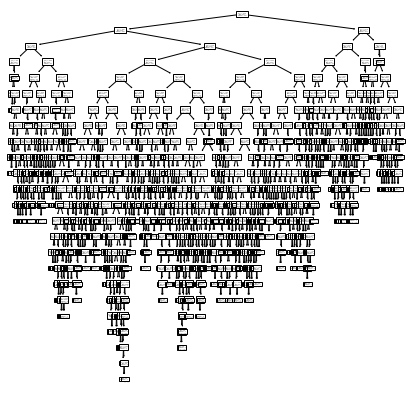

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (7, 7))

plot_tree(dt)
plt.show()

In [51]:
from sklearn.tree import DecisionTreeClassifier  # 스무고개처럼 분석

dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9980758129690206
0.8569230769230769


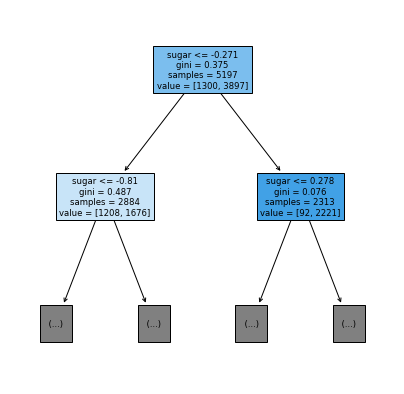

In [52]:
plt.figure(figsize = (7,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [53]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8487588993650182
0.8384615384615385


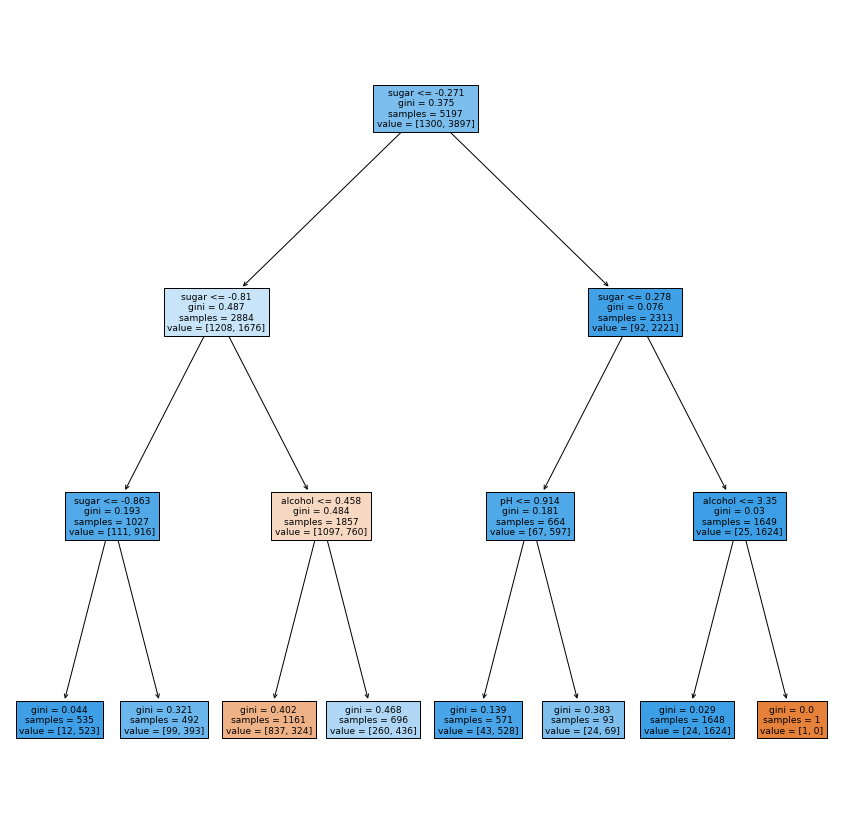

In [55]:
plt.figure(figsize = (15,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [56]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8487588993650182
0.8384615384615385


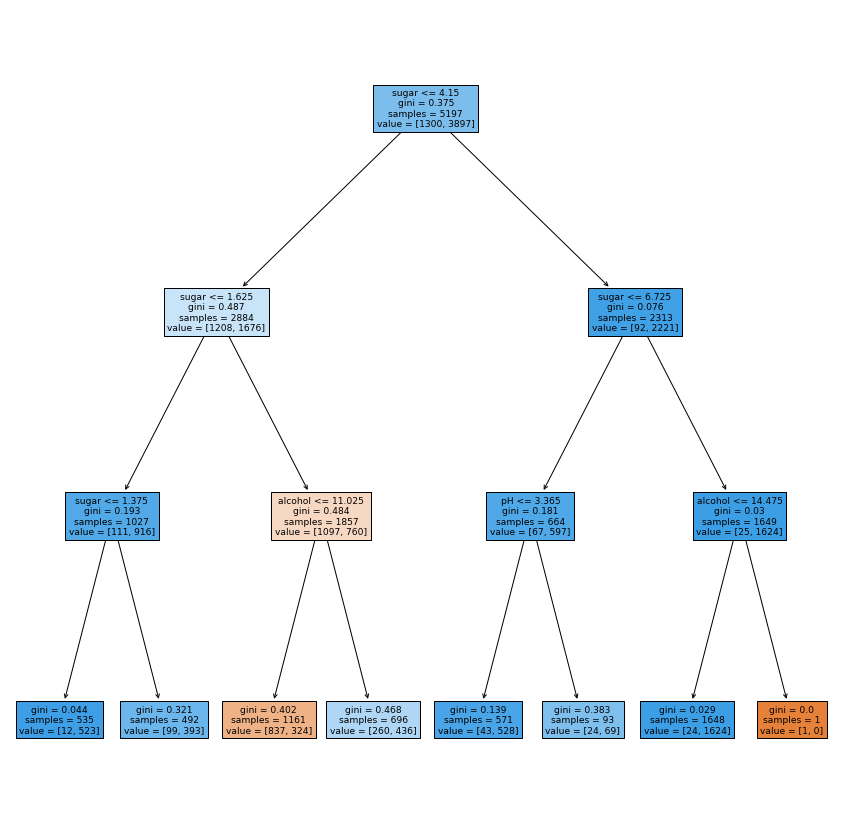

In [57]:
plt.figure(figsize = (15,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [58]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size = 0.2)

In [59]:
dt = DecisionTreeClassifier()
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9980755352417608
0.8490384615384615


In [60]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01016355, 0.00815535, 0.00752091, 0.00792074, 0.00793314]), 'score_time': array([0.00094724, 0.00087094, 0.00083447, 0.00080538, 0.00091982]), 'test_score': array([0.85384615, 0.86923077, 0.86910491, 0.87295476, 0.86429259])}


In [61]:
np.mean(scores['test_score'])

0.8658858369734211

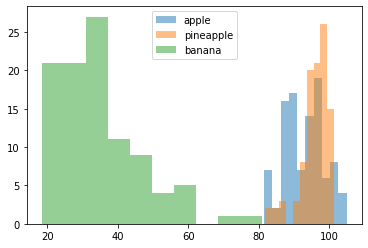

In [79]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load("fruits_300.npy")
fruits.shape

apple = fruits[:100].reshape(-1, 10000)
pineapple = fruits[100:200].reshape(-1, 10000)
banana = fruits[200:].reshape(-1, 10000)

plt.hist(np.mean(apple, axis = 1), alpha = 0.5)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.5)
plt.hist(np.mean(banana, axis = 1), alpha = 0.5)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

In [63]:
fruits[0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

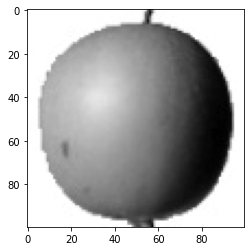

In [64]:
plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

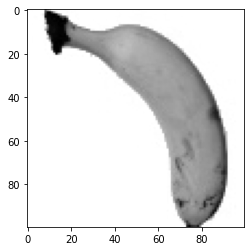

In [78]:
plt.imshow(fruits[202], cmap = 'gray_r')
plt.show()

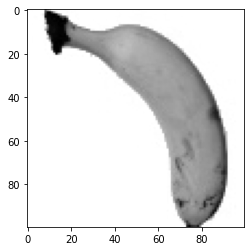

In [68]:
plt.imshow(fruits[202], cmap = 'gray_r')
plt.show()

In [69]:
apple = fruits[:100].reshape(-1, 10000)
pineapple = fruits[100:200].reshape(-1, 10000)
banana = fruits[200:].reshape(-1, 10000)

In [70]:
apple.shape

(100, 10000)

In [71]:
apple[0]

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [72]:
apple

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [75]:
apple.mean(axis = 1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

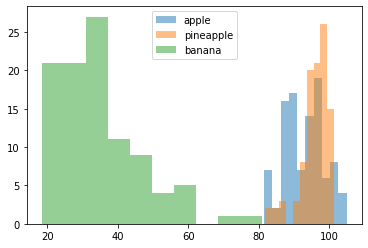

In [77]:
plt.hist(np.mean(apple, axis = 1), alpha = 0.5)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.5)
plt.hist(np.mean(banana, axis = 1), alpha = 0.5)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

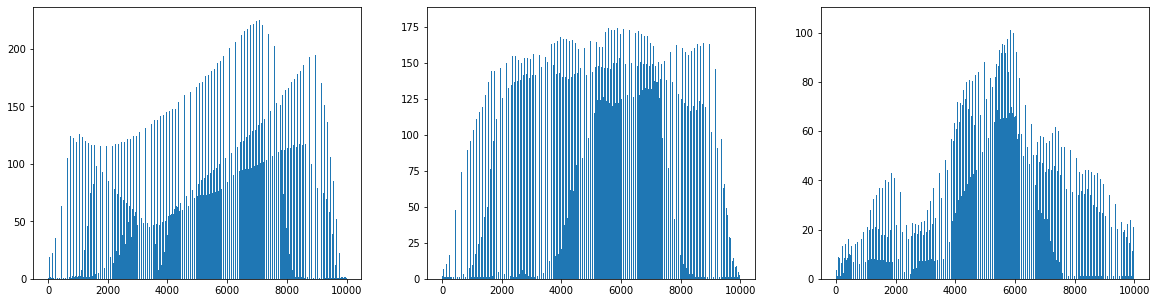

In [81]:
fig, axs = plt.subplots(1, 3, figsize = (20, 5))

axs[0].bar(range(10000), np.mean(apple, axis = 0))
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[2].bar(range(10000), np.mean(banana, axis = 0))
plt.show()

In [85]:
apple_mean = np.mean(apple, axis = 0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100, 100)
banana_mean = np.mean(banana, axis = 0).reshape(100, 100)

apple_mean

array([[1.01, 1.01, 1.01, ..., 1.  , 1.  , 1.  ],
       [1.01, 1.01, 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       ...,
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ]])

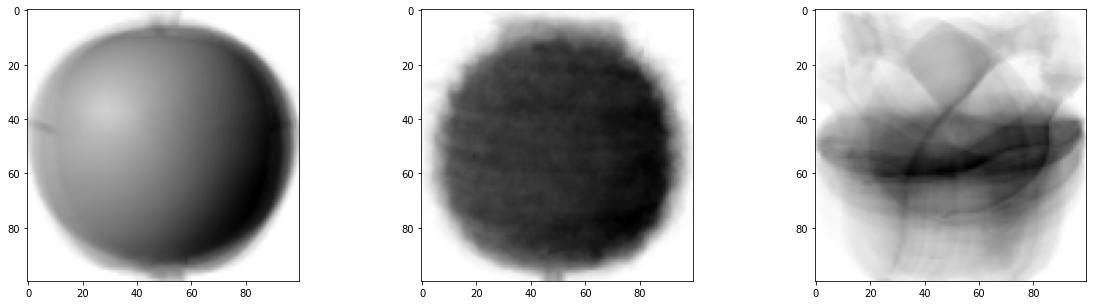

In [86]:
fig, axs = plt.subplots(1, 3, figsize = (20, 5))

axs[0].imshow(apple_mean, cmap = 'gray_r')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')
plt.show()

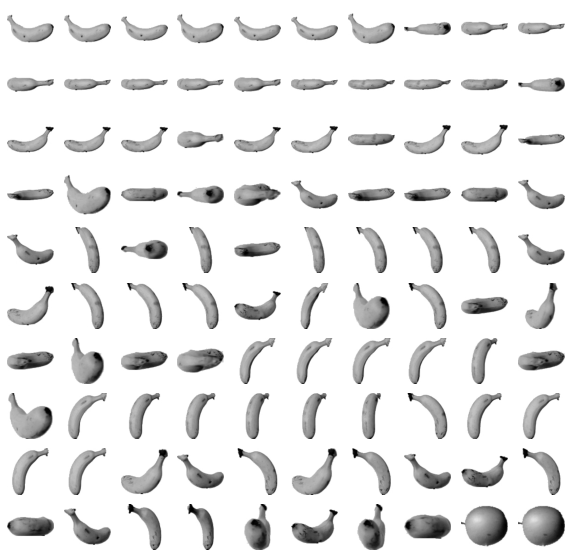

In [95]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis = (1,2))

apple_index = np.argsort(abs_mean)[:100] # 작은것에서 큰 순서대로 인덱스 반환

fig, axs = plt.subplots(10, 10, figsize = (10, 10))

for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10+j]], cmap = 'gray_r')
    axs[i, j].axis('off')
plt.show()

In [90]:
abs_mean

array([17.37576 , 13.508874, 17.183394, 15.68311 , 17.983306, 20.565392,
       16.795812, 16.144276, 19.611994, 21.32059 , 16.454222, 16.590134,
       13.37039 , 17.23263 , 15.92806 , 15.496638, 18.582212, 16.48196 ,
       27.651556, 19.7871  , 20.826912, 16.417934, 17.059946, 15.904296,
       15.086176, 19.371364, 24.076362, 14.777732, 19.20517 , 20.805182,
       14.797906, 18.658418, 15.973216, 13.04259 , 18.381052, 16.59904 ,
       16.288504, 18.960586, 13.88574 , 16.497594, 18.40376 , 19.174642,
       29.096702, 18.40849 , 28.223962, 21.42994 , 19.740466, 15.590532,
       13.082678, 18.765996, 14.391198, 21.464746, 26.261028, 15.887148,
       18.568706, 16.410426, 17.108034, 13.178824, 18.199846, 13.503056,
       20.845032, 16.898184, 22.81774 , 18.99896 , 19.102706, 16.636216,
       14.845644, 19.357872, 14.778086, 14.468082, 13.085526, 15.946606,
       20.42774 , 16.241996, 13.720382, 18.416166, 15.229106, 16.411342,
       13.47148 , 20.050622, 17.296816, 21.071312, 

In [97]:
fruits = np.load("fruits_300.npy")
fruits_2d = fruits.reshape(-1, 10000)
fruits_2d.shape

(300, 10000)

In [98]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)
km.fit(fruits_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
km.labels_

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [100]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 98, 111,  91]))

In [106]:
def draw_fruits(arr, ratio = 1):
  
  n = len(arr)

  rows = int(np.ceil(n/10)) # 올림
  cols = n if rows < 2 else 10

  fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10+j < n:
        axs[i, j].imshow(arr[i*10+j], cmap = 'gray_r')
      axs[i,j].axis('off')
  plt.show()

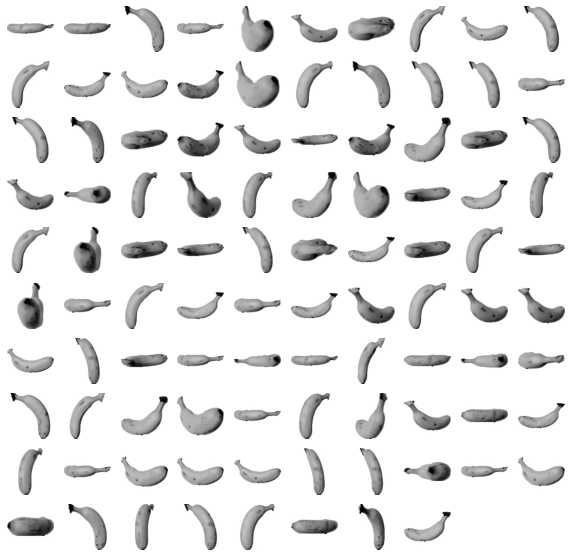

In [103]:
draw_fruits(fruits[km.labels_ == 0])

In [108]:
km.cluster_centers_.reshape(-1, 100, 100)

array([[[1.10204082, 1.07142857, 1.10204082, ..., 1.04081633,
         1.01020408, 1.05102041],
        [1.12244898, 1.03061224, 1.04081633, ..., 1.        ,
         1.01020408, 1.        ],
        [1.06122449, 1.02040816, 1.02040816, ..., 1.        ,
         1.05102041, 1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]],

       [[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1. 

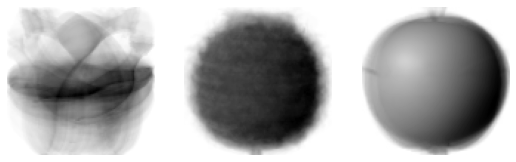

In [109]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio= 3)

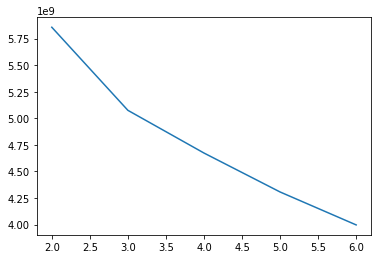

In [110]:
inertia = []

for k in range(2, 7):
  km = KMeans(n_clusters=k)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.show()

In [111]:
fruits_2d

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [112]:
# PCA : 주성분

from sklearn.decomposition import PCA

pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [113]:
pca.components_.shape

(50, 10000)

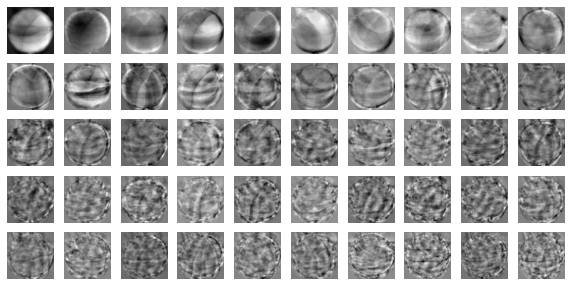

In [114]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [115]:
fruits_2d.shape

(300, 10000)

In [116]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [117]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

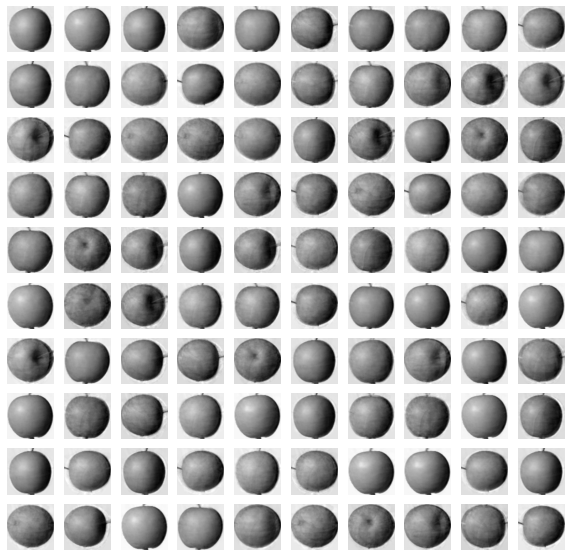

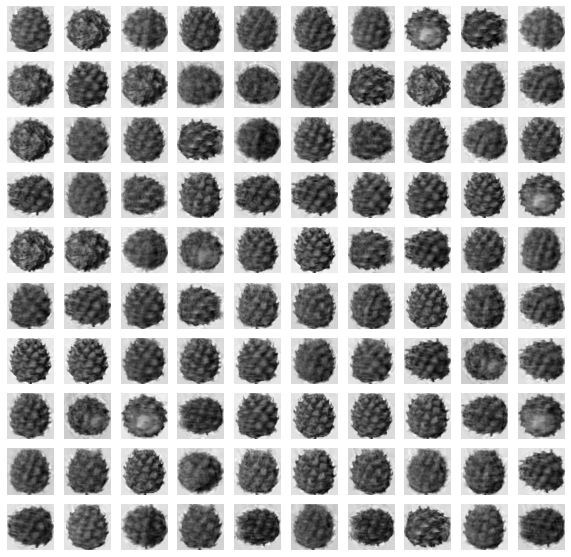

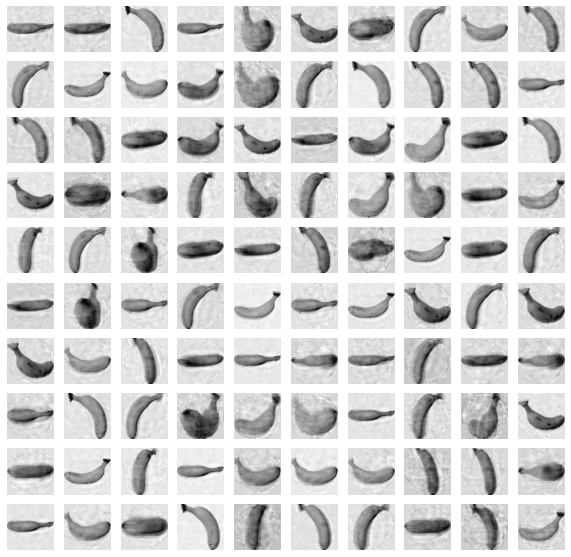

In [118]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for i in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[i:i+100])
  print('\n')

In [120]:
np.sum(pca.explained_variance_ratio_)

0.9214821513399266

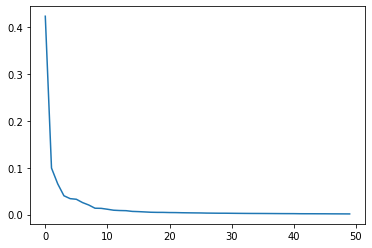

In [121]:
plt.plot(pca.explained_variance_ratio_)

In [122]:
pca = PCA(n_components=2)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [123]:
pca.n_components_

2

In [124]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [125]:
fruits_pca

array([[-2778.41779459, -1571.87380428],
       [-3078.27365136, -2739.27040926],
       [-2620.61072939, -1486.87054697],
       [-3113.71771062, -2530.02283455],
       [-2520.64705144, -2330.64791627],
       [-1556.73860341,   123.05167329],
       [-2711.38755162, -1857.35297864],
       [-2884.74283654, -1836.15286845],
       [-2310.99240338, -2660.46265306],
       [-1521.26665012, -2445.3743841 ],
       [-2486.91643797, -1475.55043267],
       [-2800.83912843, -2001.07116271],
       [-2810.56248913, -2034.36322452],
       [-2209.09841637, -2303.76591923],
       [-2917.38810303, -2438.42530844],
       [-2198.1718942 ,  -636.80183839],
       [-2317.61818126, -2704.80151794],
       [-3289.84664277, -2436.39344262],
       [-2641.95018377,   503.7490883 ],
       [-3563.8760831 , -1290.01167696],
       [-3708.64597097, -1575.33618548],
       [-2423.96625858, -2080.63343878],
       [-3169.13983546, -2238.74224115],
       [-3059.33441459, -2250.14899543],
       [-2745.82

In [126]:
target = [0] * 100 + [1] * 100 + [2] * 100
print(target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [127]:
lr = LogisticRegression()
scores = cross_validate(lr, fruits_pca, target)
np.mean(scores['test_score'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9966666666666667

In [128]:
lr = LogisticRegression()
scores = cross_validate(lr, fruits_pca, target)
np.mean(scores['test_score'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9966666666666667

In [129]:
len(target)

300

In [130]:
km = KMeans(n_clusters=3)
km.fit(fruits_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [131]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))

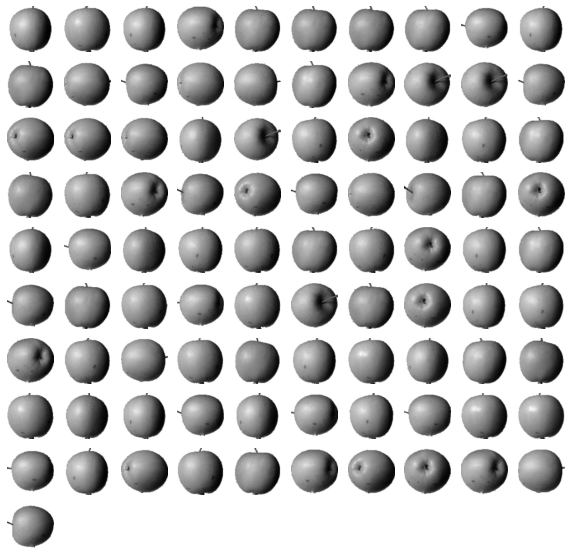

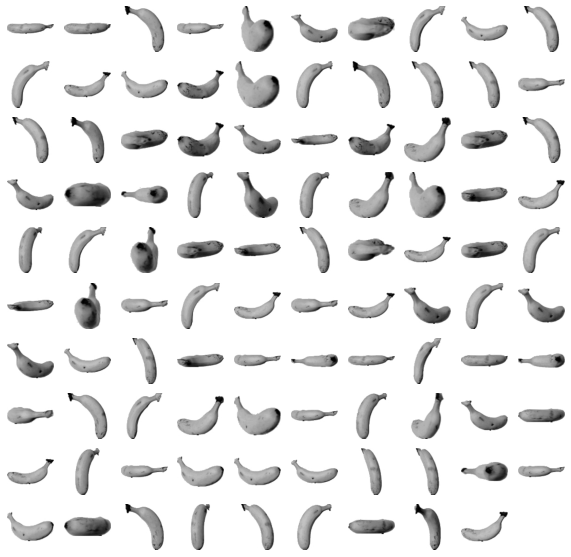

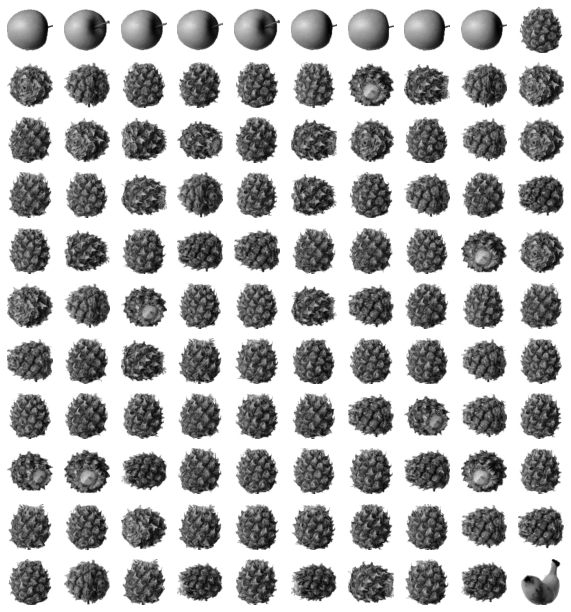

In [133]:
for i in range(0, 3):
  draw_fruits(fruits[km.labels_ == i])
  print('\n')

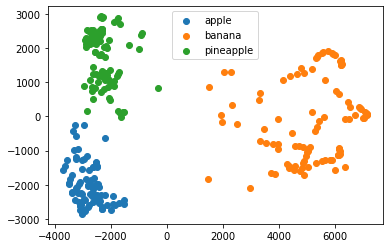

In [134]:
for i in range(0, 3):
  data = fruits_pca[km.labels_ == i]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

In [135]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [136]:
train_input.shape

(60000, 28, 28)

In [137]:
test_input.shape

(10000, 28, 28)

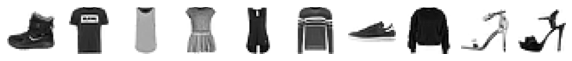

In [141]:
fig, axs = plt.subplots(1, 10, figsize = (10, 10))

for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')
plt.show()

In [139]:
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [142]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [143]:
train_scaled = train_input / 255
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled.shape

(60000, 784)

In [144]:
from sklearn.linear_model import SGDClassifier

from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255
train_scaled = train_scaled.reshape(-1, 28*28)

sc = SGDClassifier(max_iter = 10)
scores = cross_validate(sc, train_scaled, train_target)
np.mean(scores['test_score'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

0.8215666666666668

In [145]:
# 82%
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2)

In [147]:
model = keras.Sequential() # 도화지 (인공신경망을 그리기 위한 도화지)
model.add(keras.layers.Dense(10, activation = 'softmax', input_shape = (784,)))

model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs = 10)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6085 - accuracy: 0.7944
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4813 - accuracy: 0.8399
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4581 - accuracy: 0.8475
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4465 - accuracy: 0.8520
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4378 - accuracy: 0.8553
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4336 - accuracy: 0.8570
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4294 - accuracy: 0.8589
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4278 - accuracy: 0.8605
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4246 - accuracy: 0.8617
Epoch 10/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.422

In [148]:
# 85.6%
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4282 - accuracy: 0.8562


[0.42815402150154114, 0.856166660785675]

In [153]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'relu', input_shape = (784,)))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs = 10)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5331 - accuracy: 0.8123
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3967 - accuracy: 0.8579
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3623 - accuracy: 0.8694
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3404 - accuracy: 0.8785
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3247 - accuracy: 0.8834
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3142 - accuracy: 0.8883
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3051 - accuracy: 0.8929
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2971 - accuracy: 0.8951
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2902 - accuracy: 0.8978
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.282

In [154]:
# 88.38%
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3582 - accuracy: 0.8838


[0.35823437571525574, 0.8837500214576721]

In [155]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [156]:
train_scaled = train_input / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2)

Epoch 1/10000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6588 - accuracy: 0.7687 - val_loss: 0.4385 - val_accuracy: 0.8413
Epoch 2/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4990 - accuracy: 0.8219 - val_loss: 0.3969 - val_accuracy: 0.8525
Epoch 3/10000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4615 - accuracy: 0.8336 - val_loss: 0.3831 - val_accuracy: 0.8610
Epoch 4/10000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4392 - accuracy: 0.8409 - val_loss: 0.3617 - val_accuracy: 0.8692
Epoch 5/10000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4242 - accuracy: 0.8441 - val_loss: 0.3521 - val_accuracy: 0.8732
Epoch 6/10000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4139 - accuracy: 0.8479 - val_loss: 0.3519 - val_accuracy: 0.8719
Epoch 7/10000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4045 - accuracy: 0.8507 - val_loss: 0

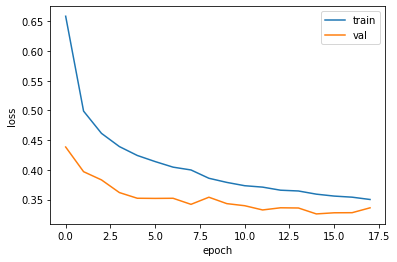

In [164]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')

checkpoint = keras.callbacks.ModelCheckpoint('best.h5')
early = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 10000, validation_data=(val_scaled, val_target), callbacks=[checkpoint, early])

# 89%
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [165]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255

In [166]:
train_scaled.shape

(60000, 28, 28, 1)

In [167]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2)

Epoch 1/10000
1500/1500 [==============================] - 64s 42ms/step - loss: 0.5967 - accuracy: 0.7793 - val_loss: 0.3823 - val_accuracy: 0.8591
Epoch 2/10000
1500/1500 [==============================] - 63s 42ms/step - loss: 0.4055 - accuracy: 0.8523 - val_loss: 0.3091 - val_accuracy: 0.8862
Epoch 3/10000
1500/1500 [==============================] - 63s 42ms/step - loss: 0.3394 - accuracy: 0.8787 - val_loss: 0.2730 - val_accuracy: 0.8997
Epoch 4/10000
1500/1500 [==============================] - 63s 42ms/step - loss: 0.3042 - accuracy: 0.8901 - val_loss: 0.2714 - val_accuracy: 0.9006
Epoch 5/10000
1500/1500 [==============================] - 64s 42ms/step - loss: 0.2756 - accuracy: 0.9005 - val_loss: 0.2560 - val_accuracy: 0.9082
Epoch 6/10000
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2546 - accuracy: 0.9070 - val_loss: 0.2392 - val_accuracy: 0.9147
Epoch 7/10000
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2390 - accuracy: 0.9137

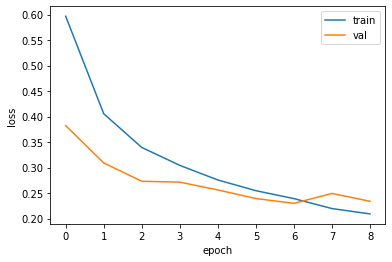

In [168]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2)) # 사진 사이즈의 크기를 2배로 줄인다.
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')

checkpoint = keras.callbacks.ModelCheckpoint('best.h5')
early = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 10000, validation_data=(val_scaled, val_target), callbacks=[checkpoint, early])

# 89%
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [169]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500) # 빈도순위 1위 500위까지 단어

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [170]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [172]:
len(train_input[1])

189

In [173]:
# 0이면 부정 // 1이면 긍정
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2)

In [174]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100) # 무조건 100개로 맞춘다. 많으면 자르고 적으면 0으로 채운다.
val_seq = pad_sequences(val_input, maxlen = 100)

In [175]:
train_seq.shape

(20000, 100)

In [176]:
train_seq[0]

array([ 49,   2,  96,   2,  33,  89,   2,  12,   9,   2,  11,   4, 109,
        18, 463,  60,   4, 362,  70,  30,  66,   2,   2,   2,  19,   4,
         2,   2,   2,   5, 331,  78,   2,   2,  32,  20, 196,   5,  89,
        25,  70,  30, 141,   6,   2,   5,   2,  44,   2,  54,   2, 205,
       113, 218,   2,  46,  10,  10,  32,  13,  70, 135,   9,  14,  20,
       484,   2,  61,   2,  48,  24,   2,  12,  10,  10,  12,   2,  72,
         2,   8,   4, 268,  13, 426,  60, 193,  61,   2, 125,  12,  24,
        60,   8,  97,  46,  11,   4, 438,   2,   2], dtype=int32)

In [177]:
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

In [178]:
train_oh[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [179]:
train_oh.shape

(20000, 100, 500)

Epoch 1/100
625/625 [==============================] - 19s 29ms/step - loss: 0.6052 - accuracy: 0.6665 - val_loss: 0.5135 - val_accuracy: 0.7550
Epoch 2/100
625/625 [==============================] - 18s 28ms/step - loss: 0.4743 - accuracy: 0.7790 - val_loss: 0.4684 - val_accuracy: 0.7870
Epoch 3/100
625/625 [==============================] - 18s 29ms/step - loss: 0.4501 - accuracy: 0.7948 - val_loss: 0.4880 - val_accuracy: 0.7854
Epoch 4/100
625/625 [==============================] - 18s 29ms/step - loss: 0.4379 - accuracy: 0.8023 - val_loss: 0.4679 - val_accuracy: 0.7868
Epoch 5/100
625/625 [==============================] - 18s 29ms/step - loss: 0.4235 - accuracy: 0.8081 - val_loss: 0.4631 - val_accuracy: 0.7848
Epoch 6/100
625/625 [==============================] - 17s 28ms/step - loss: 0.4180 - accuracy: 0.8134 - val_loss: 0.4682 - val_accuracy: 0.7868
Epoch 7/100
625/625 [==============================] - 16s 26ms/step - loss: 0.4081 - accuracy: 0.8155 - val_loss: 0.4816 - val_ac

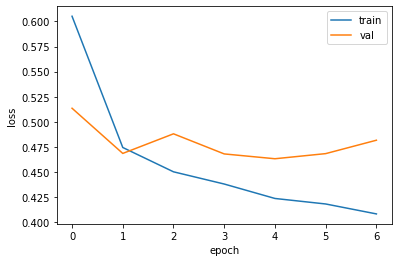

In [180]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics='accuracy')

checkpoint = keras.callbacks.ModelCheckpoint('best.h5')
early = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

history = model.fit(train_oh, train_target, epochs=100, validation_data=(val_oh, val_target), callbacks=[checkpoint, early])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()